<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/Tutorial2_ProbabilityPrimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [49]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))
def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [50]:
results=toss_coin()
print(results.value_counts())
image=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
image.show()

Heads    51
Tails    49
dtype: int64


In [51]:
results=pd.Series([np.sum(toss_coin(20)=='Heads') for _ in range(1000)])
image=pg.Figure([pg.Bar(x=results.value_counts().keys(), y=results.value_counts().values)])
image.show()

In [52]:
results=pd.Series([np.sum(toss_coin(500)=='Heads') for _ in range(5000)])
image=pg.Figure([pg.Bar(x=results.value_counts().keys(), y=results.value_counts().values)])
image.show()

In [53]:
results={shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
image=pg.Figure([pg.Bar(x=result.value_counts().keys(), y=result.value_counts().values / shots,)for shots, result in results.items()])
image.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
image.show()

In [54]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']
    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)
    return np.mean(cards_thrown_counts), cards_thrown_counts
expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

7 cards were thrown: JS 2D 9S 6D 8C QC QS AH
0 cards were thrown: AH
6 cards were thrown: 2S 4D 6D 5S 10S 9H AS
30 cards were thrown: 9S 3D 9H 7C 10D KC 9C 4D 3S 8D 5S 2H 7D 3C 8S 6H 4C 2C QC JD 2D KD JH KH QH 6S 4S 5H 4H 10S AS
1 cards were thrown: 7H AC
4 cards were thrown: 3C 7C 7H 4D AS
1 cards were thrown: 4S AH
11 cards were thrown: KC 4C 2C 6S 6H QH 6D KH 10S 7S 4D AH
7 cards were thrown: 9S 10H 5S 10S 9C 6C KD AC
32 cards were thrown: 9H 3D 4D 7S 5S QS KC 6S 2C 5C 7C 3C 6C 9D 9C 8H 6H QH 7H JD 5D 8S 3H JC 7D 2D JS JH 2H 8D 10H 9S AH

9.629 cards are tossed before we see the first ace!


In [55]:
results=pd.Series(cards_thrown_counts)
image=pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
image.show()

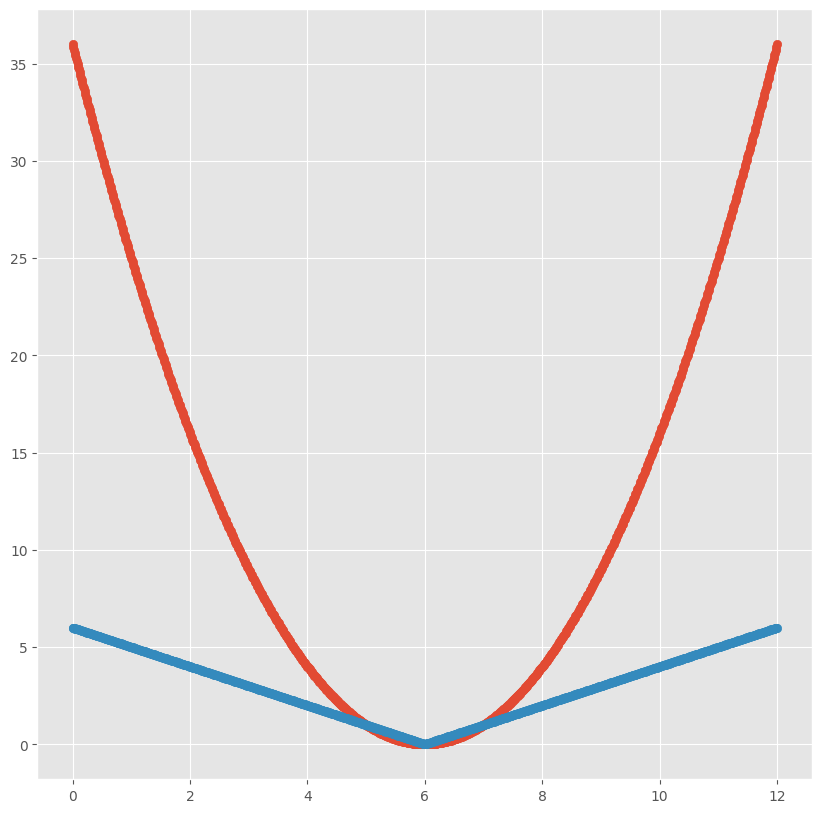

In [56]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [57]:
grades=pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


<ipython-input-57-c1fcdcae6317>:3: FutureWarning:

['Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


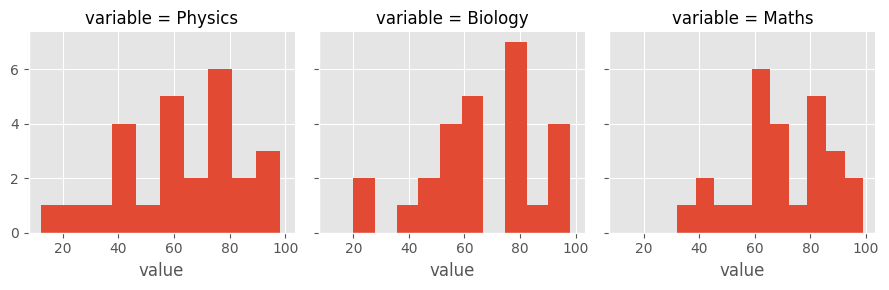

In [58]:
a=sns.FacetGrid(grades.melt("Name"), col="variable")
a.map(plt.hist, "value")

In [59]:
grades["Physics_std"]=(grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [60]:
grades["Maths_std"]=(grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [61]:
from scipy.stats import binom
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [62]:
1-binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)
binom.cdf(3, n=5, p=0.75)

0.3671875

In [63]:
from scipy.stats import norm

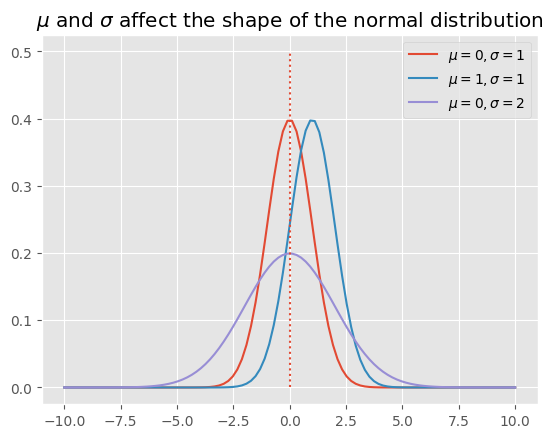

In [64]:
x = np.linspace(-10, 10, 100)
f1=norm.pdf(x, loc=0, scale=1)
f2=norm.pdf(x, loc=1, scale=1)
f3=norm.pdf(x, loc=0, scale=2)
plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")
plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [65]:
norm.cdf(0)

0.5

In [66]:
norm.ppf(0.5)

0.0

In [67]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [68]:
169.57 + 7.57

177.14

In [69]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [70]:
169.57+2*7.57

184.70999999999998

In [71]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [72]:
169.57-3*7.57

146.85999999999999

In [73]:
from scipy.stats import poisson

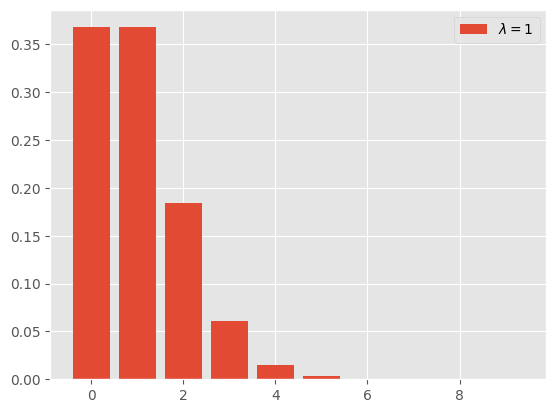

In [74]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)
plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [75]:
x@f1

0.999998874797402

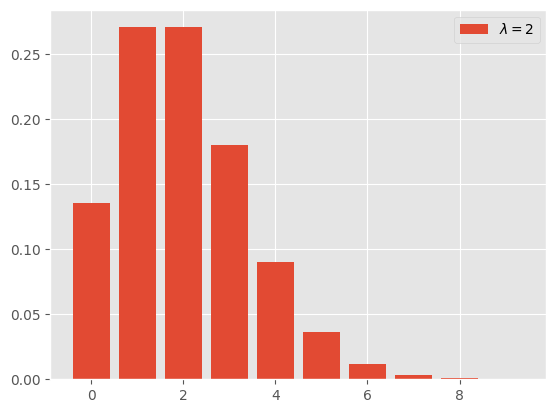

In [76]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [77]:
x@f2

1.999525105343477

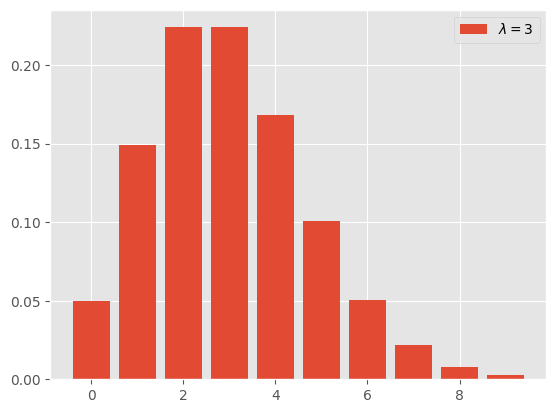

In [78]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [79]:
x@f3

2.9885910238149727

In [80]:
poisson.pmf(3, 5)

0.1403738958142805

In [81]:
from scipy.stats import poisson

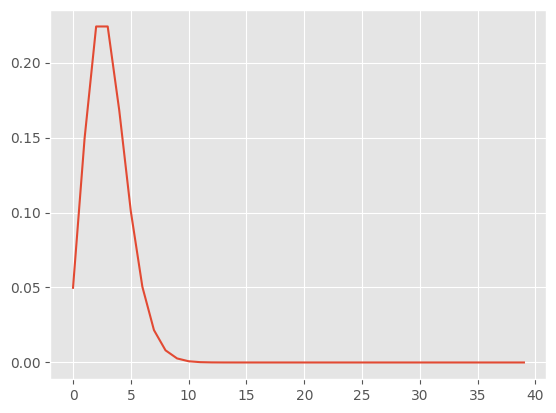

In [82]:
bins=np.arange(0, 40)
p_pois=poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 2.,  5., 38., 71., 96., 87., 71., 17.,  9.,  4.]),
 array([1.8 , 2.05, 2.3 , 2.55, 2.8 , 3.05, 3.3 , 3.55, 3.8 , 4.05, 4.3 ]),
 <BarContainer object of 10 artists>)

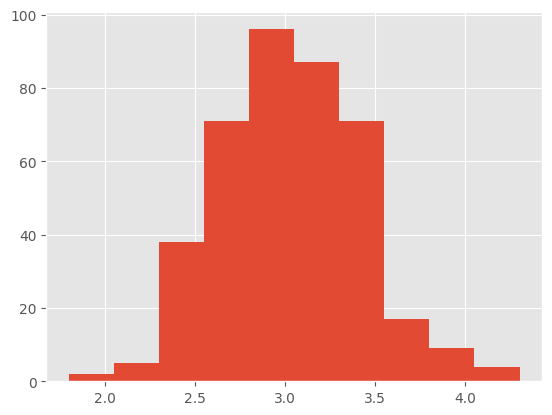

In [83]:
def sample_pois(_):
    samples=poisson.rvs(mu=3, size=20)
    return np.mean(samples)
means=list(map(sample_pois, np.arange(400)))
plt.hist(means)

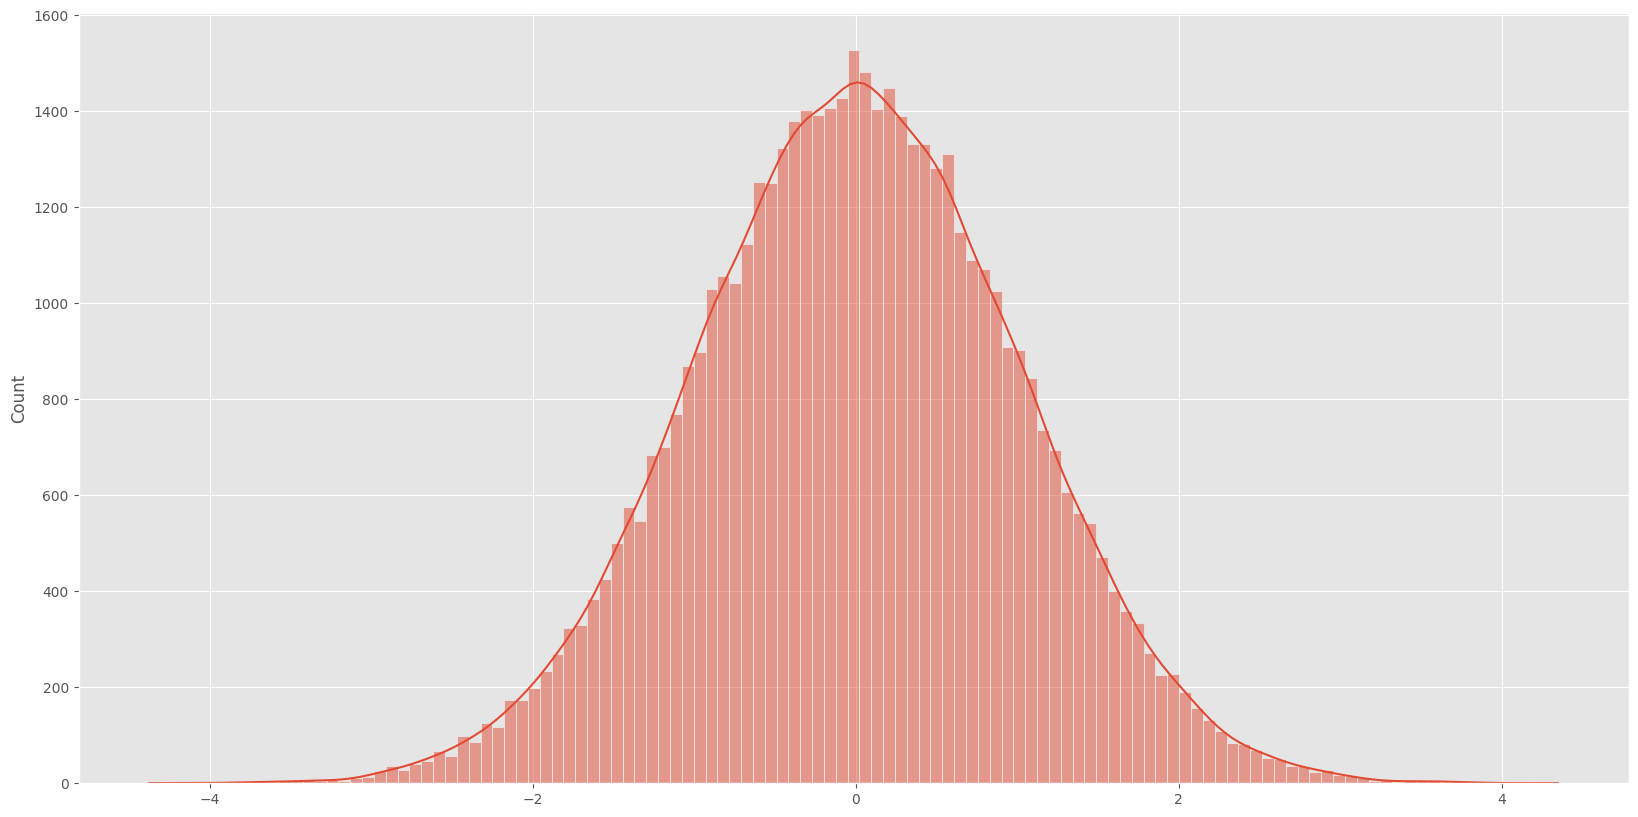

In [84]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x=np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

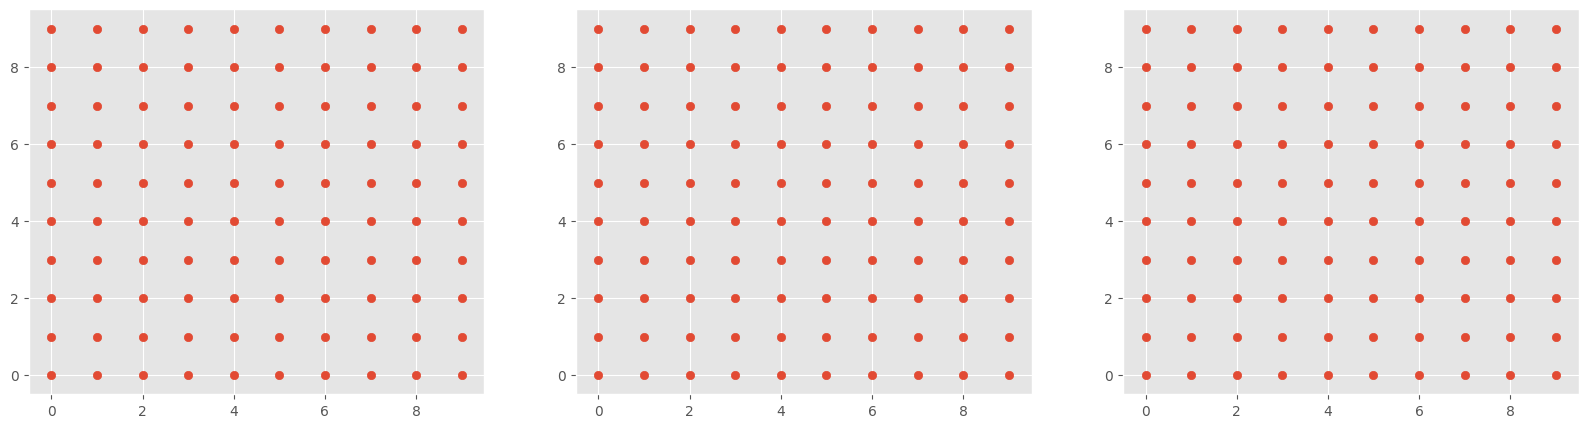

In [85]:
fix, axs=plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x,y=np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

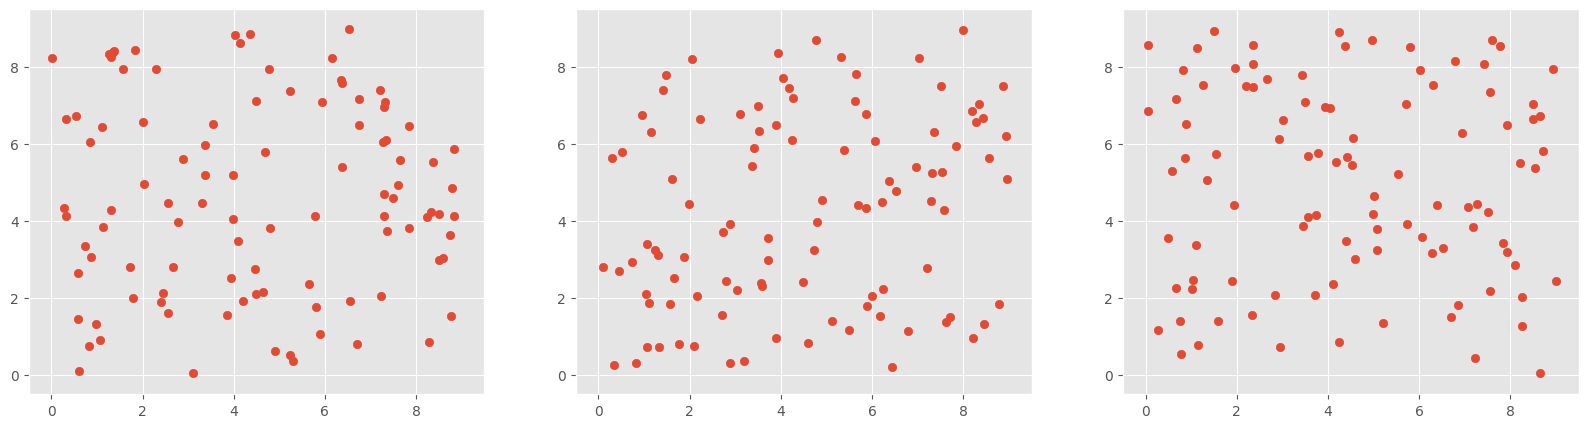

In [86]:
fix,axs=plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x,y=np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

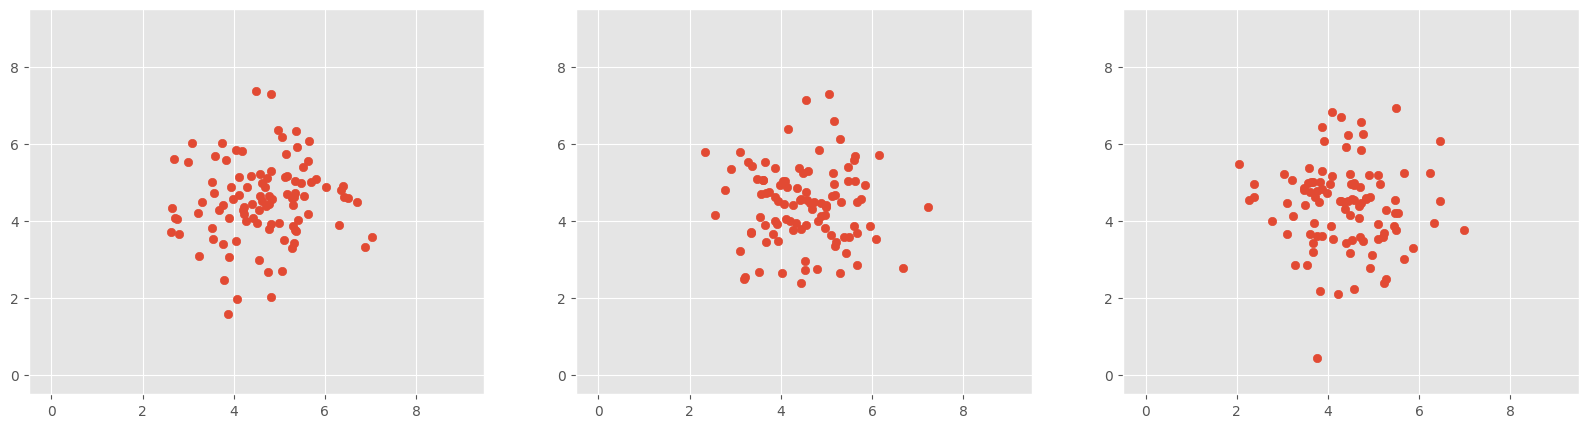

In [87]:
fix,axs=plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x,y=np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()